In [1]:
!pip install pandas==0.23.4
!pip install scikit-learn==0.20.0  
!pip install sklearn_pandas
!pip install seaborn==0.9.0

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso,Ridge,ElasticNet,RidgeCV,LassoCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import PowerTransformer,QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, KFold, train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn_pandas import DataFrameMapper, gen_features

from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVR

%matplotlib inline

**EDA.**

Данные взяты с сайта: https://archive.ics.uci.edu/ml/datasets/Air+Quality

Описание данных.
- 0 Date	(DD/MM/YYYY) 
- 1 Time	(HH.MM.SS) 
- 2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) 
- 3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)	
- 4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 
- 5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 
- 6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)	
- 7 True hourly averaged NOx concentration in ppb (reference analyzer) 
- 8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
- 9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)	
- 10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)	
- 11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 
- 12 Temperature in Â°C	
- 13 Relative Humidity (%) 
- 14 AH Absolute Humidity 

Данные описаны следующим образом:
Датчики, собирающие данные, находились в достаточно загрязнненом месте, в черте города.

Данные собирались с двух сенсоров.

Всего набор данных содержит 9358 экземпляров ежечасных усредненных ответов.

Данные были зарегистрированы с марта 2004 года по февраль 2005 года (один год).

Целевой параметр - C6H6(GT), а именно истинная среднечасовая концентрация бензола в мкг/м.куб, полученная при помощи эталонного анализатора. 

Также: Пропущенные данные помечены как -200. 

In [3]:
#df = pd.read_csv('./data/AirQualityUCI.csv', sep= ';', decimal=",")
df = pd.read_csv('https://raw.githubusercontent.com/DSmentor/EPAM_SPb_DS_course_files/master/2.Regression/AirQualityUCI.csv', sep=';', decimal=",")

In [4]:
df.shape

(9471, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


Проверим, что за колонки Unnamed: 15, Unnamed: 16 появились после чтения файла 

In [6]:
df['Unnamed: 15'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 15, dtype: float64

In [7]:
df['Unnamed: 16'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 16, dtype: float64

Удалим эти колонки, потому, что они не содержат никакой информации и похоже, появились из-за пустых значений в столбцах, после исходных данных.

In [8]:
df.drop(['Unnamed: 15','Unnamed: 16'],axis = 1, inplace=True)

In [9]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [10]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Похоже из csv считалась часть пустых строк как Nan.
Проверим, что при удалении строк с Nan не удалим часть данных.

In [11]:
df[pd.isnull(df).any(axis=1)].index

Int64Index([9357, 9358, 9359, 9360, 9361, 9362, 9363, 9364, 9365, 9366,
            ...
            9461, 9462, 9463, 9464, 9465, 9466, 9467, 9468, 9469, 9470],
           dtype='int64', length=114)

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(9357, 15)

Сконвертируем столбцы Date и Time к типу df.Datetime и выделим из них новые признаки: год, месяц, день, час.

In [14]:
df['Date']=pd.to_datetime(df.Date, format='%d/%m/%Y')
df['Year']=df['Date'].dt.year #encode Year 2004 as 0 and 2005 as 1
df['Month']=df.Date.dt.month
df['Day']=df.Date.dt.day
df['Hour']= pd.to_datetime(df['Time'], format = "%H.%M.%S").dt.hour

In [15]:
df['Year'] = pd.Categorical(df['Year'])
df['Year'] = df['Year'].cat.codes

Дропнем столбец Time, т.к. он содержит только значения часов и этот столбец вырожден в новый столбец Hour с типом int64.

In [16]:
df.drop(['Time'],axis = 1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 18 columns):
Date             9357 non-null datetime64[ns]
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Year             9357 non-null int8
Month            9357 non-null int64
Day              9357 non-null int64
Hour             9357 non-null int64
dtypes: datetime64[ns](1), float64(13), int64(3), int8(1)
memory usage: 1.3 MB


Выделим численные переменные в отдельный набор и зафиксируем целевую переменную.

In [18]:
df_num = df.select_dtypes(include=['float64','int64','int8','datetime64[ns]'])
numerical_features = list(df_num)
numerical_features.remove('Date')
Target_var = 'C6H6(GT)'

После того, как удалили паразитные Nan'ы, построим гистограммы, чтобы посмотреть как распределены данные:

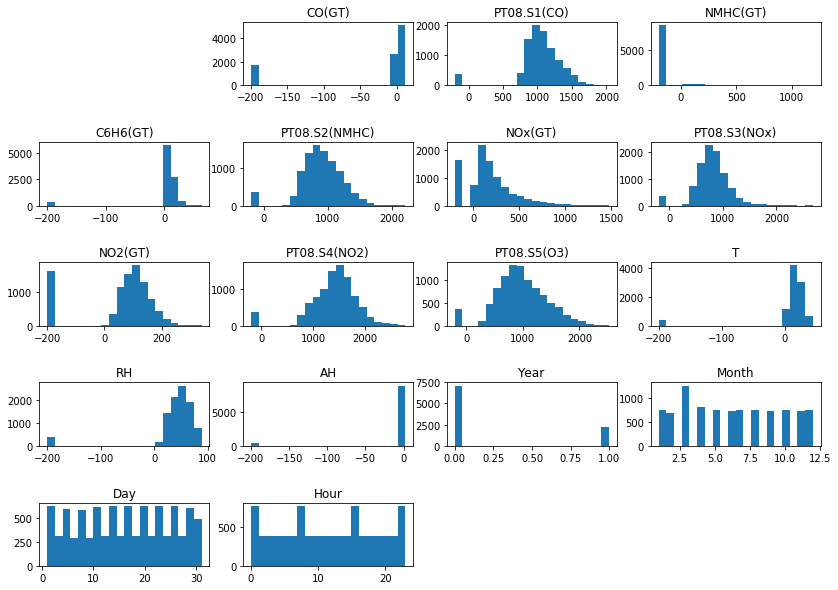

In [19]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(df_num.columns[1:]): #skio the date, because it ruins the plot build
    plt.subplot(5,4,i+2)
    plt.hist (df_num[col],bins=20)
    plt.subplots_adjust(hspace = 0.9)
    plt.title(col);

Построим график распределения целевого значения.

E:\Python\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


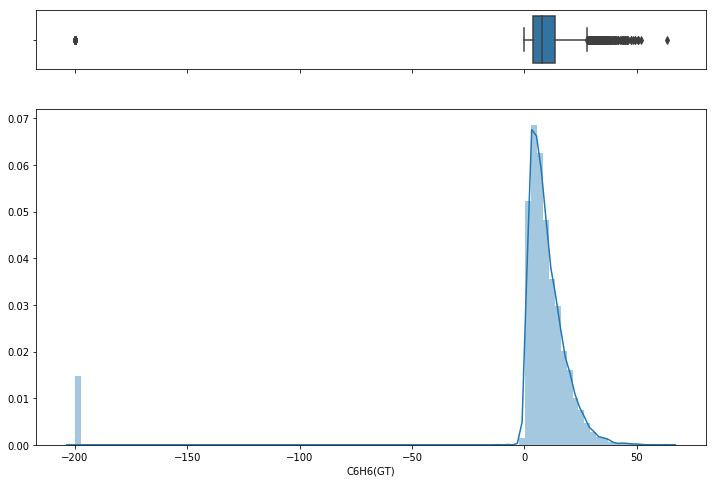

In [20]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12, 8))
 
# Add a graph in each part
sns.boxplot(df_num[Target_var], ax=ax_box)
sns.distplot(df_num[Target_var], ax=ax_hist, bins=100, hist_kws={'alpha': 0.4},norm_hist=True)

# Remove x axis name for the boxplot
ax_box.set(xlabel='');

Как видно, на графики сильно влияет наличие пропусков (-200) в целевой переменной.
Посмотрим численные статистики по признакам, а затем попробуем удалить пропуски.

In [21]:
df_num.shape

(9357, 18)

In [22]:
df_num.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Hour
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,0.240141,6.310356,15.876884,11.498557
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,0.427192,3.438160,8.808653,6.923182
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,0.000000,1.000000,1.000000,0.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,0.000000,3.000000,8.000000,5.000000
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,0.000000,6.000000,16.000000,11.000000
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,0.000000,9.000000,23.000000,18.000000
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,1.000000,12.000000,31.000000,23.000000


Посчитаем количество пропусков в целевой переменной:

In [23]:
#df[df['C6H6(GT)'] == -200].count()
df_num[Target_var].eq(-200).sum()

366

In [24]:
indexies = df_num[df_num[Target_var] == -200].index
indexies

Int64Index([ 524,  525,  526,  701,  702,  703,  704,  705,  706,  707,
            ...
            8106, 8107, 8108, 8109, 8110, 8111, 8112, 8113, 8114, 8777],
           dtype='int64', length=366)

Удалим строки с пропусками.

In [25]:
df_num.drop(indexies, axis=0, inplace=True)

In [26]:
df_num.reset_index(drop=True,inplace=True)

После того, как очистили целевой столбец от пропусков, выделим столбец Date в индекс.
Так как, дата уже преобразована в новые признаки.

In [27]:
df_num.set_index('Date',inplace=True)

In [28]:
df_num.shape

(8991, 17)

Повторим построение графиков зависимости от целевой переменной и график распределения.

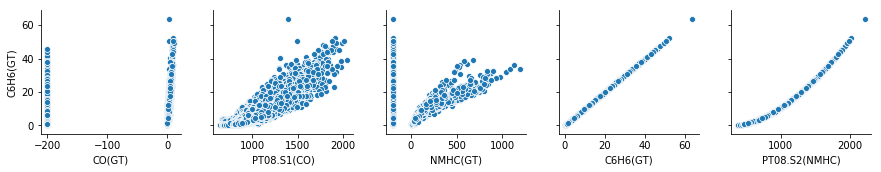

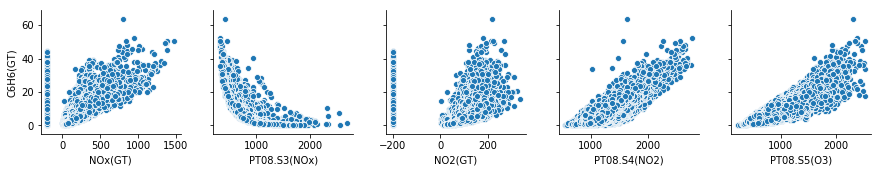

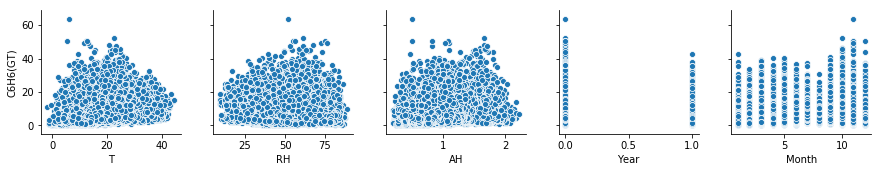

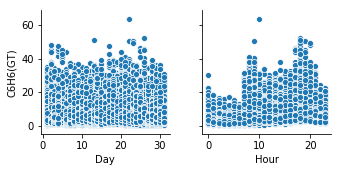

In [29]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                 x_vars=df_num.columns[i:i+5],
                 y_vars=[Target_var])

Вывод: видно, что некоторые данные содержат пропуски.
также заметны выбросы на некоторых графиках PT08.S2(NMHC),PT08.S5(O3).

Построим график распределения целевого значения.

E:\Python\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


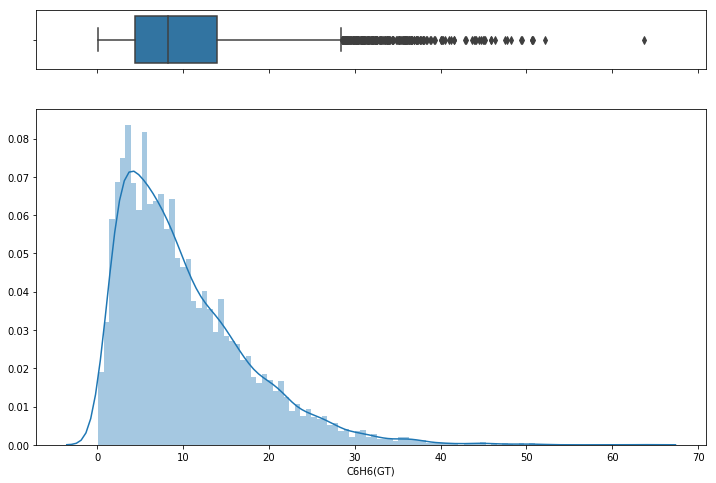

In [30]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12, 8))
 
# Add a graph in each part
sns.boxplot(df_num[Target_var], ax=ax_box)
sns.distplot(df_num[Target_var], ax=ax_hist, bins=100, hist_kws={'alpha': 0.4},norm_hist=True)

# Remove x axis name for the boxplot
ax_box.set(xlabel='');

А если применить логарифм, то получается следующий вид:

E:\Python\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


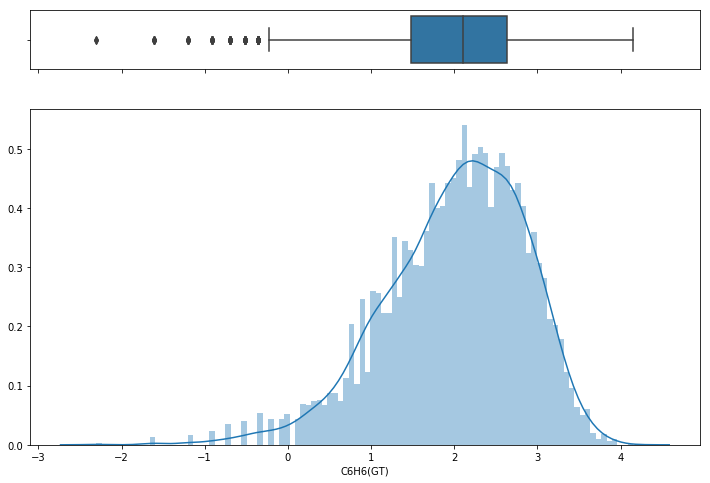

In [31]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12, 8))
sns.boxplot(np.log(df_num[Target_var]), ax=ax_box)
sns.distplot(np.log(df_num[Target_var]), ax=ax_hist, bins=100, hist_kws={'alpha': 0.4},norm_hist=True)

# Remove x axis name for the boxplot
ax_box.set(xlabel='');


Также проверим распределение целевой переменной на нормальность:

H0 = распределение нормальное

H1 = распределение не нормальное


In [32]:
st.normaltest(df_num[Target_var])

NormaltestResult(statistic=2180.6450994373045, pvalue=0.0)

Так как p-value < 0.05, то при уровне значимости $\alpha = 0.05$ мы отвергаем нулевую гипотезу.

Вывод. Распределение целевого признака не имеет вид нормального.

**Data Preparation.**

Приступим к подготовке данных перед построением модели регрессии.
Посмотрим, в каких колонках наблюдаются пропуски и попробуем их заполнить.

In [33]:
for col in df_num:
    print (col , df_num[col].eq(-200).sum())

CO(GT) 1647
PT08.S1(CO) 0
NMHC(GT) 8104
C6H6(GT) 0
PT08.S2(NMHC) 0
NOx(GT) 1595
PT08.S3(NOx) 0
NO2(GT) 1598
PT08.S4(NO2) 0
PT08.S5(O3) 0
T 0
RH 0
AH 0
Year 0
Month 0
Day 0
Hour 0


NMHC(GT) удалим, т.к. отсутсвует около 90% процентов данных.

In [34]:
df_num.drop('NMHC(GT)', axis=1, inplace=True)
numerical_features.remove('NMHC(GT)')

Заполнения требуют: 
2. CO(GT), True hourly averaged concentration CO in mg/m^3 (reference analyzer) 
7. NOx(GT), True hourly averaged NOx concentration in ppb (reference analyzer)
9. NO2(GT), True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

Посмотрим для каких промежутков времени наблюдаются пропуски.

In [35]:
na_for_groups = df_num[['CO(GT)','NOx(GT)','NO2(GT)','Year','Month','Day','Hour']].copy()

In [36]:
count_NA_by_day = na_for_groups.groupby(['Year', 'Month','Day']).apply(lambda x: x[x == -200].count())
count_NA_by_day

CO(GT)  NOx(GT)  NO2(GT)  Year  Month  Day  Hour
Year Month Day                                                  
0    3     10        0        0        0     0      0    0     0
           11        1        1        1     0      0    0     0
           12        2        2        2     0      0    0     0
           13        1        1        1     0      0    0     0
           14        1        1        1     0      0    0     0
           15        1        1        1     0      0    0     0
           16        1        1        1     0      0    0     0
           17        1        1        1     0      0    0     0
           18        1        1        1     0      0    0     0
           19        1        1        1     0      0    0     0
           20        1        1        1     0      0    0     0
           21        1        1        1     0      0    0     0
           22        1        1        1     0      0    0     0
           23        1        1        1     0      0    0     0
           24        2        1        1     0      0    0     0
           25        0        1        1     0      0    0     0
           26        0        1        1     0      0    0     0
           27        1        1        1     0      0    0     0
           28        0        1        1     0      0    0     0
           29        0        1        1     0      0    0     0
           30        1        1        1     0      0    0     0
           31        0        1        1     0      0    0     0
     4     1         0        1        1     0      0    0     0
           2         1        1        1     0      0    0     0
           3        14       15       15     0      0    0     0
           4        24       24       24     0      0    0     0
           5        10       10       10     0      0    0     0
           6         0        1        1     0      0    0     0
           7         0        1        1     0      0    0     0
           8         1        1        1     0      0    0     0
...                ...      ...      ...   ...    ...  ...   ...
1    3     6         0        1        1     0      0    0     0
           7         0        1        1     0      0    0     0
           8         1        1        1     0      0    0     0
           9         0        1        1     0      0    0     0
           10        0        2        2     0      0    0     0
           11        1        0        0     0      0    0     0
           12        4        0        0     0      0    0     0
           13        6        0        0     0      0    0     0
           14        1        0        0     0      0    0     0
           15        0        0        0     0      0    0     0
           16        0        0        0     0      0    0     0
           17        1        0        0     0      0    0     0
           18        0        0        0     0      0    0     0
           19        0        0        0     0      0    0     0
           20        1        0        0     0      0    0     0
           21        0        0        0     0      0    0     0
           22        0        0        0     0      0    0     0
           23        1        0        0     0      0    0     0
           24        0        0        0     0      0    0     0
           25        0        0        0     0      0    0     0
           26        1        0        0     0      0    0     0
           27        0        0        0     0      0    0     0
           28        0        0        0     0      0    0     0
           29        1        0        0     0      0    0     0
           30        0        0        0     0      0    0     0
           31        0        0        0     0      0    0     0
     4     1         1        0        0     0      0    0     0
           2         0        0        0     0      0    0     0
           3         0        0        0     0     

По итогу, в данных, есть дни, когда отсутсвует только несколько значений, но есть и дни, когда пропуски наблюдаются во всех значениях.

Заполним значения пропусков в днях - медианой дня.

Для дней, когда отсуствуют все значения - возьмем медиану по месяцу.

Для заполнения выбрана медиана, как наиболее подходящее в данном случае.
Выбирается, потому, что она дает меньшее смещение, чем среднее, для наших данных.


In [37]:
df_num.replace(-200,np.nan, inplace=True) # для удобства, -200 заменин на nan, чтобы воспользоваться штатной функцией

In [38]:
state_before_day = df_num[(df_num['Month'] == 3) & (df_num['Day'] == 11) & (df_num['Year'] == 0)]['CO(GT)']
median_before_day = df_num[(df_num['Month'] == 3) & (df_num['Day'] == 11) & (df_num['Year'] == 0)]['CO(GT)'].median()

Заменим пропуски по дням

In [39]:
df_num['CO(GT)']=df_num['CO(GT)'].fillna(df_num.groupby(['Year','Month','Day'])['CO(GT)'].transform('median'))
df_num['NOx(GT)']=df_num['NOx(GT)'].fillna(df_num.groupby(['Year','Month','Day'])['NOx(GT)'].transform('median'))
df_num['NO2(GT)']=df_num['NO2(GT)'].fillna(df_num.groupby(['Year','Month','Day'])['NO2(GT)'].transform('median'))

Проверим полученный результат:

In [40]:
state_after_day = df_num[(df_num['Month'] == 3) & (df_num['Day'] == 11) & (df_num['Year'] == 0)]['CO(GT)']
print("values before ", state_before_day)
print("get median day before transformation",median_before_day)
print("values after ",state_after_day)

values before  Date
2004-03-11    1.2
2004-03-11    1.0
2004-03-11    0.9
2004-03-11    0.6
2004-03-11    NaN
2004-03-11    0.7
2004-03-11    0.7
2004-03-11    1.1
2004-03-11    2.0
2004-03-11    2.2
2004-03-11    1.7
2004-03-11    1.5
2004-03-11    1.6
2004-03-11    1.9
2004-03-11    2.9
2004-03-11    2.2
2004-03-11    2.2
2004-03-11    2.9
2004-03-11    4.8
2004-03-11    6.9
2004-03-11    6.1
2004-03-11    3.9
2004-03-11    1.5
2004-03-11    1.0
Name: CO(GT), dtype: float64
get median day before transformation 1.7
values after  Date
2004-03-11    1.2
2004-03-11    1.0
2004-03-11    0.9
2004-03-11    0.6
2004-03-11    1.7
2004-03-11    0.7
2004-03-11    0.7
2004-03-11    1.1
2004-03-11    2.0
2004-03-11    2.2
2004-03-11    1.7
2004-03-11    1.5
2004-03-11    1.6
2004-03-11    1.9
2004-03-11    2.9
2004-03-11    2.2
2004-03-11    2.2
2004-03-11    2.9
2004-03-11    4.8
2004-03-11    6.9
2004-03-11    6.1
2004-03-11    3.9
2004-03-11    1.5
2004-03-11    1.0
Name: CO(GT), dtype: float6

И заполним пропуски по месяцам.

In [41]:
state_before_month = df_num[(df_num['Month'] == 4)& (df_num['Day'] == 4) & (df_num['Year'] == 0)]['CO(GT)']
median_before_month = df_num[(df_num['Month'] == 4) & (df_num['Year'] == 0)]['CO(GT)'].median()

In [42]:
df_num['CO(GT)']=df_num['CO(GT)'].fillna(df_num.groupby(['Year','Month'])['CO(GT)'].transform('median'))
df_num['NOx(GT)']=df_num['NOx(GT)'].fillna(df_num.groupby(['Year','Month'])['NOx(GT)'].transform('median'))
df_num['NO2(GT)']=df_num['NO2(GT)'].fillna(df_num.groupby(['Year','Month'])['NO2(GT)'].transform('median'))

In [43]:
state_after_month = df_num[(df_num['Month'] == 4) & (df_num['Day'] == 4) & (df_num['Year'] == 0)]['CO(GT)']
print("values before ", state_before_month)
print("get median month before transformation",median_before_month)
print("values after ",state_after_month)

values before  Date
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
2004-04-04   NaN
Name: CO(GT), dtype: float64
get median month before transformation 2.0
values after  Date
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
2004-04-04    2.0
Name: CO(GT), dtype: float64


Перед тем, как приступать к анализу корреляций между признаками, следует посмотреть boxplot'ы на предмет выбросов (они как известно сильно на нее могут повлиять).

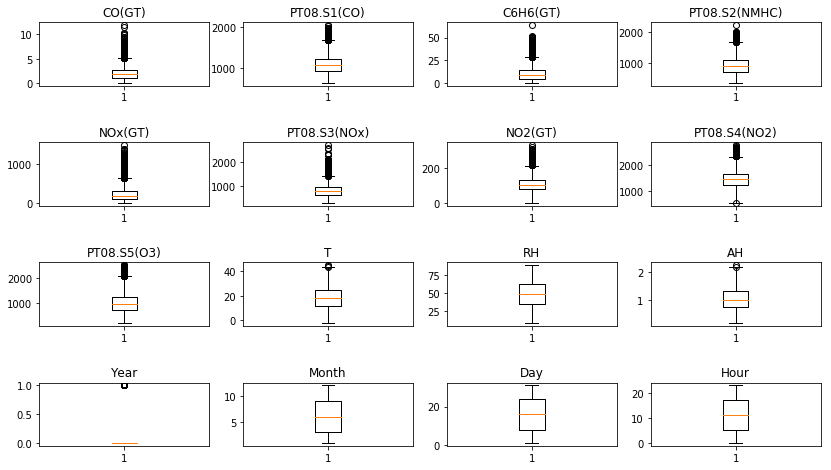

In [44]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(df_num.columns):
    plt.subplot(5,4,i+1)
    plt.boxplot(df_num[col])
    plt.subplots_adjust(hspace = 0.9)
    plt.title(col);

Наиболее выделяется выброс у нашей целевой переменной и PT08.S2(NHMC).

Исследуем его дополнительно.

In [45]:
df_num[df_num['PT08.S2(NMHC)'] > 1950]

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Hour
Date,,,,,,,,,,,,,,,,
2004-10-26,9.5,1908.0,52.1,2007.0,952.0,325.0,180.0,2775.0,2372.0,22.5,61.5,1.6579,0,10,26,18
2004-11-22,3.1,1493.0,50.7,1981.0,846.0,448.0,215.0,1567.0,2346.0,5.4,55.1,0.4970,0,11,22,9
2004-11-22,3.1,1394.0,63.7,2214.0,801.0,411.0,218.0,1629.0,2311.0,6.2,51.8,0.4952,0,11,22,10
2004-11-23,10.2,1982.0,49.5,1959.0,1369.0,322.0,227.0,2536.0,2386.0,13.2,72.6,1.0936,0,11,23,18
2004-11-23,11.9,2008.0,50.6,1980.0,1389.0,325.0,220.0,2562.0,2342.0,12.4,74.7,1.0741,0,11,23,19
2004-11-23,11.5,1918.0,49.4,1958.0,1358.0,335.0,190.0,2477.0,2237.0,11.5,76.2,1.0324,0,11,23,20
2004-12-13,9.9,1881.0,50.8,1983.0,1479.0,334.0,269.0,2271.0,2523.0,12.6,55.9,0.8142,0,12,13,18


Судя по значениям признаков, это не является выбросом, т.к. прослеживается линейная связь между величинами (с ростом C6H6 растет и PT08.S2(NMHC)).

**Корреляция.**

Рассмотрим:
- матрицу корреляции признаков с целевой переменной.
- корреляцию между признаками.

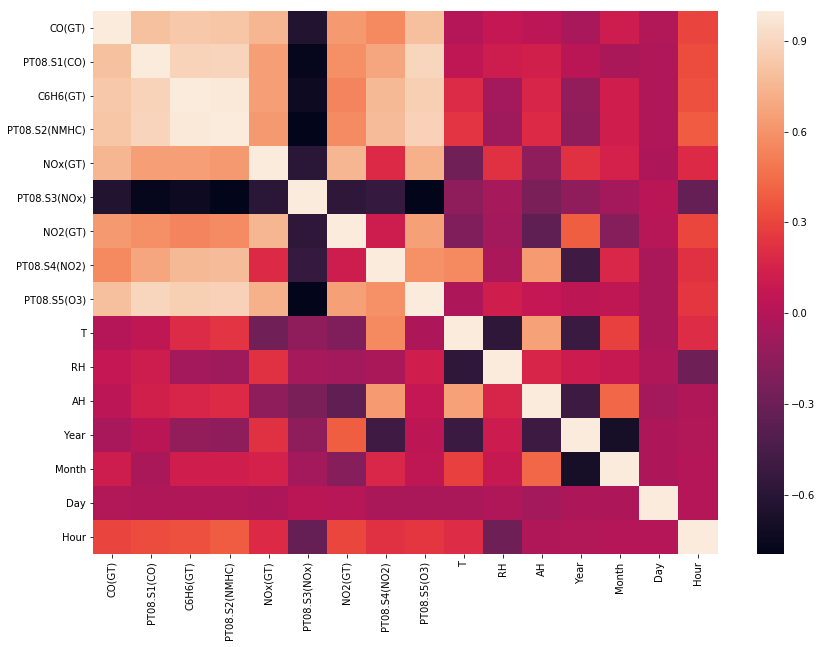

In [46]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_num.corr(method='pearson'));

Для удобства дальнейшего анализа выделим топ фич, которые коррелируют с нашей целевой переменной.

In [47]:
df_num_corr = df_num.corr(method='pearson')[Target_var].drop(Target_var)
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with C6H6:\n{}".format(len(golden_features_list), golden_features_list))

There is 8 strongly correlated values with C6H6:
PT08.S2(NMHC)    0.981950
PT08.S1(CO)      0.883795
PT08.S5(O3)      0.865689
CO(GT)           0.834437
PT08.S4(NO2)     0.765731
NOx(GT)          0.644489
NO2(GT)          0.542681
PT08.S3(NOx)    -0.735744
Name: C6H6(GT), dtype: float64


In [48]:
gdf = golden_features_list.keys()

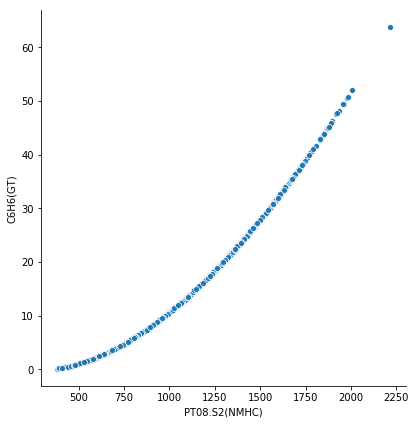

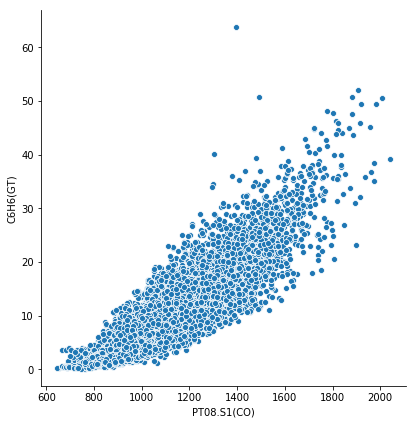

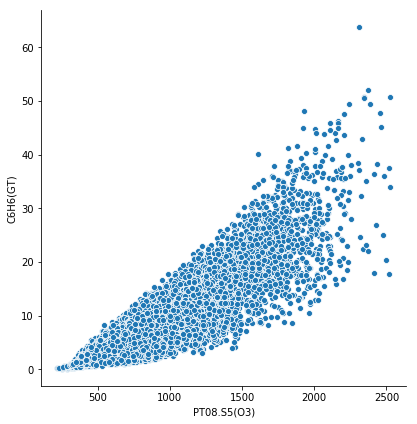

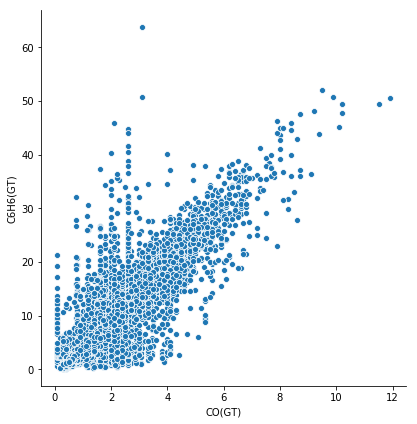

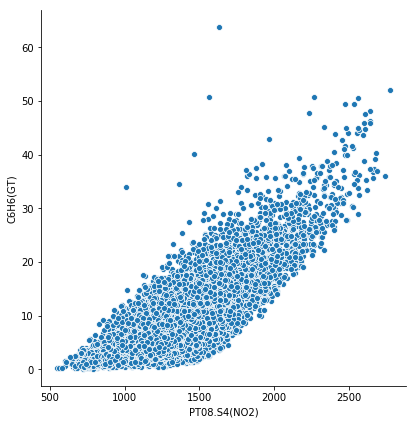

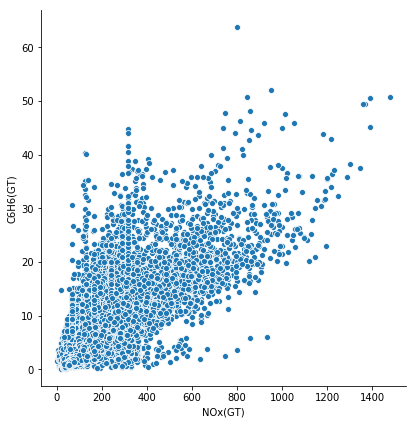

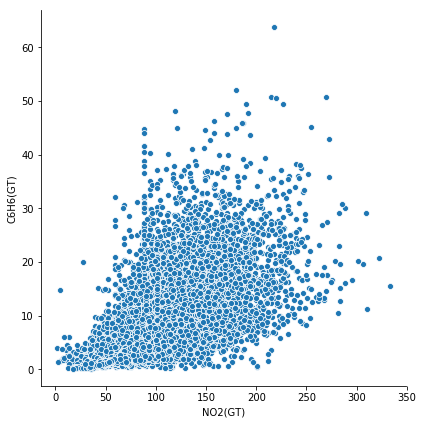

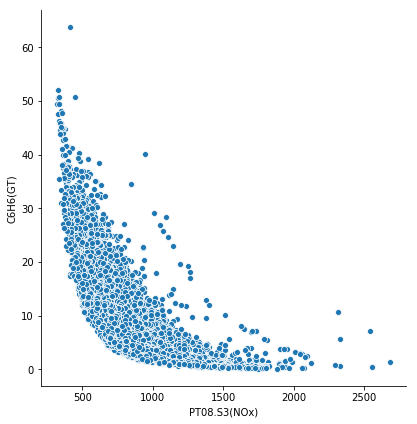

In [49]:
for i in range(0, len(gdf)):
    sns.pairplot(data=df_num,
                 x_vars=[gdf[i]],
                 y_vars=[Target_var] , height=6)

Корреляция между признаками.

Оценим взаимосвязь, т.к. при построении модели это может помочь сократить часть признаков (если некоторые признаки коррелируют сильно между собой, то можно оставить только один/либо их скобминировать).

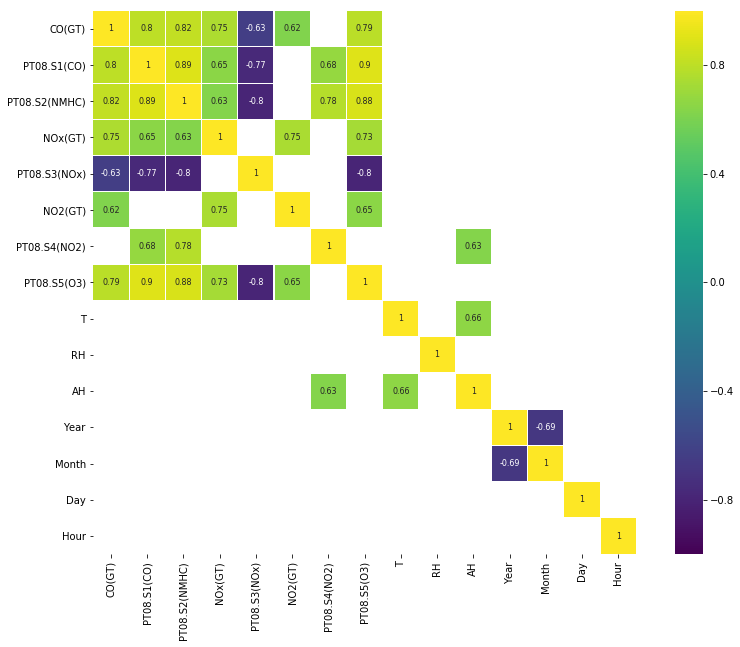

In [50]:
df_feature_corr = df_num.drop(Target_var, axis=1).corr(method = 'pearson')

plt.figure(figsize=(14, 10))
sns.heatmap(df_feature_corr[abs(df_feature_corr) > 0.6], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [51]:
df_num_corr_08 = df_num.corr(method='pearson')['PT08.S2(NMHC)'].drop('PT08.S2(NMHC)')
golden_features_list_08 = df_num_corr_08[abs(df_num_corr_08) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with C6H6:\n{}".format(len(golden_features_list_08), 
                                                                     golden_features_list_08))

There is 8 strongly correlated values with C6H6:
C6H6(GT)        0.981950
PT08.S1(CO)     0.892964
PT08.S5(O3)     0.880578
CO(GT)          0.817542
PT08.S4(NO2)    0.777254
NOx(GT)         0.627825
NO2(GT)         0.565988
PT08.S3(NOx)   -0.796703
Name: PT08.S2(NMHC), dtype: float64


PT08.S2(NMHC) сильнее всего коррелирует с нашей целевой переменной, а также с PT08.S1(CO),CO(GT),PT08.S4(NO2),PT08.S5(O3).

После построения Baseline попробуем иследовать поведение модели, с учетом корреляций.

**Baseline model.(модель 1)**

Разделим данные на train/test.

In [52]:
y = df_num[Target_var]
X = pd.concat([df_num.drop(Target_var, axis=1)], axis=1, sort=False)

Т.к. производится работа с временным рядом, то перемешивание следует отключить, чтобы избежать обучения на "будущих" значениях.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5, shuffle=False)
numerical_features.remove(Target_var)

In [54]:
X_train.shape

(6293, 15)

In [55]:
X_test.shape

(2698, 15)

In [56]:
y_train.shape

(6293,)

In [57]:
y_test.shape

(2698,)

**Version with pipeline.**

Составим функцию, в которой будет строиться pipeline и производится оценка обощающей способности модели.

В качестве метрик будет использовать RMSE и R2.

RMSE, используем потому, что её обычно используют в таких задачах.

R2 используем, как метрику, характеризующую "точность" модели. Используя этот коэффициент достаточно просто определить, результат вычислений. Если он близок к 1, то условная дисперсия модели достаточно мала и вероятно, что модель неплохо описывает данные.

Для проверки результатов pipeline и кросс-валидации в apendix приведен код, производящий такие же действия, но с использованием sklear_pandas.

In [58]:
def check_model(train_x, test_x, train_y, test_y, regr,features):
    #print (train_y)
    numerical_features = features
    num_features_pipeline = Pipeline([
        ('scale', MinMaxScaler()),
        #('impute', SimpleImputer(missing_values=-200, strategy='median')),
        #('scale', RobustScaler()),
        #('scale', StandardScaler()),
        #('transform', QuantileTransformer(output_distribution='normal'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_features_pipeline, numerical_features),
        ])

    classifier_pipeline = Pipeline(
        steps=[
            ('preprocessing', preprocessor),
            ('classify', regr)
        ])
    all_features_transformed = classifier_pipeline.fit(train_x, train_y)
    #for key in classifier_pipeline.get_params().keys():
    #    print(key)
    
    print ("Scores via train dataset.")
    print ("mean squared error")
    y_pred_t = classifier_pipeline.predict(train_x)
    print (np.sqrt(mean_squared_error(train_y, y_pred_t)))
    print ("R2 score")
    accuracy_train = r2_score (train_y,y_pred_t)
    print (accuracy_train)
    
    print ("\n")
    print ("Scores via test dataset.")
    print ("mean squared error")
    y_pred = classifier_pipeline.predict(test_x)
    print (np.sqrt(mean_squared_error(test_y, y_pred)))
    print ("R2 score")
    accuracy_test = r2_score (test_y,y_pred)
    print (accuracy_test)
    coefs = all_features_transformed.steps[1][1].coef_
    print(pd.DataFrame(coefs,train_x[features].columns,columns=['coef']).sort_values(by='coef',ascending = False))
    return all_features_transformed

Выполним функцию, с полученным ранее, тест-сплитом.

In [59]:
lin_regr = LinearRegression()
results = check_model (X_train, X_test, y_train, y_test, lin_regr, numerical_features)

E:\Python\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Scores via train dataset.
mean squared error
0.9382334265350436
R2 score
0.9850436486598811


Scores via test dataset.
mean squared error
4.2321727239927736
R2 score
0.5885758539470666
                       coef
PT08.S2(NMHC)  4.447037e+01
PT08.S4(NO2)   1.493365e+01
PT08.S3(NOx)   1.043392e+01
NOx(GT)        3.700550e+00
Month          3.567735e+00
CO(GT)         2.485837e+00
PT08.S1(CO)    1.253492e+00
Day            6.229788e-01
PT08.S5(O3)    1.424288e-02
Year           1.243450e-14
Hour          -5.668614e-01
AH            -1.502309e+00
NO2(GT)       -2.507784e+00
RH            -2.648136e+00
T             -3.102971e+00


Проведем анализ остатков на основе базовой модели. (Observed – Predicted).

Text(0,0.5,'Residuals')

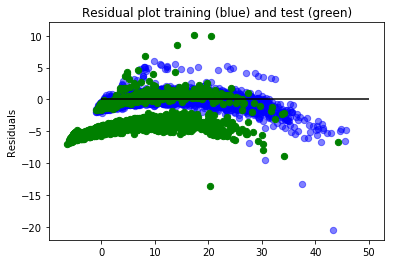

In [60]:
y_pred = results.predict(X_test)
residuals = y_test - y_pred
plt.scatter(results.predict(X_train),results.predict(X_train) - y_train, c = 'b', s = 40,alpha=0.5)
plt.scatter(results.predict(X_test),results.predict(X_test) - y_test, c = 'g', s = 40)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.title("Residual plot training (blue) and test (green)")
plt.ylabel("Residuals")

In [61]:
comp1 = results.predict(X_train) - y_train
comp2 = results.predict(X_test) - y_test
#применим z-преобразование
comp1 = (comp1-comp1.mean())/comp1.std()
comp2 = (comp2-comp2.mean())/comp2.std()

print (comp1.mean(), comp1.var())
print (st.shapiro(comp1))

print (comp2.mean(), comp2.var())
print (st.shapiro(comp2))

st.levene(comp1,comp2)

-3.516088492099058e-17 0.9999999999999989
(0.8292331695556641, 0.0)
-2.1793784963008725e-15 1.0000000000000027
(0.8433506488800049, 1.401298464324817e-45)


E:\Python\anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


LeveneResult(statistic=7.575710780558343, pvalue=0.005927870759793634)

Так как p-value < 0.05, то при уровне значимости $\alpha = 0.05$ мы отвергаем нулевую гипотезу.

Вывод. По результатам теста Левене гомоскедастичность не наблюдается, судя по графику, есть существенное смещение.

Перед тем, как преступать к регуляризации попробуем повторить оценку модели, но уже используя признаки, обладающие, высокой корреляцией с целевым признаком.

In [62]:
golden_features_list[:-1]#кроме последнего, т.к. у него отрицательная корреляция

PT08.S2(NMHC)    0.981950
PT08.S1(CO)      0.883795
PT08.S5(O3)      0.865689
CO(GT)           0.834437
PT08.S4(NO2)     0.765731
NOx(GT)          0.644489
NO2(GT)          0.542681
Name: C6H6(GT), dtype: float64

In [63]:
lin_regr_gf = LinearRegression()
results_gf = check_model (X_train, X_test, y_train, y_test, lin_regr_gf, golden_features_list[:-1].keys())

Scores via train dataset.
mean squared error
1.2667188361082846
R2 score
0.9727375857448527


Scores via test dataset.
mean squared error
1.6373520688281251
R2 score
0.9384189408176047
                    coef
PT08.S2(NMHC)  45.979507
NOx(GT)         5.037038
CO(GT)          4.946303
PT08.S4(NO2)    3.823623
PT08.S5(O3)    -0.325284
PT08.S1(CO)    -1.236630
NO2(GT)        -3.408776


Посмотрим остатки для этой модели.

Text(0,0.5,'Residuals')

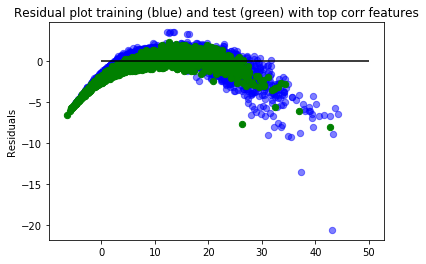

In [64]:
plt.scatter(results_gf.predict(X_train),results_gf.predict(X_train) - y_train, c = 'b', s = 40,alpha=0.5)
plt.scatter(results_gf.predict(X_test),results_gf.predict(X_test) - y_test, c = 'g', s = 40)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.title("Residual plot training (blue) and test (green) with top corr features")
plt.ylabel("Residuals")

Проверка гомоскедастичности (равенства дисперсий).
Нулевая гипотеза - дисперсии равны.

In [65]:
comp1 = results_gf.predict(X_train) - y_train
comp2 = results_gf.predict(X_test) - y_test
#применим z-преобразование
comp1 = (comp1-comp1.mean())/comp1.std()
comp2 = (comp2-comp2.mean())/comp2.std()

print (comp1.mean(), comp1.var())
print (st.shapiro(comp1))

print (comp2.mean(), comp2.var())
print (st.shapiro(comp2))

st.levene(comp1,comp2)

-2.2070379847546016e-16 0.9999999999999986
(0.8247901201248169, 0.0)
6.676563593233197e-17 0.9999999999999968
(0.9549273252487183, 4.203493289125777e-28)


E:\Python\anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


LeveneResult(statistic=43.8725546390424, pvalue=3.705698069685629e-11)

Так как p-value < 0.05, то при уровне значимости $\alpha = 0.05$ мы отвергаем нулевую гипотезу.

Вывод. По результатам теста Левене гомоскедастичность не наблюдается, хотя конус отдаленно на графике виден.

Проверим работу модели, без PT08.S1(CO),PT08.S5(O3).

In [66]:
dropped_X_train = X_train.drop(['PT08.S1(CO)','PT08.S5(O3)'],axis = 1)
dropped_X_test =  X_test.drop(['PT08.S1(CO)','PT08.S5(O3)'],axis = 1)
dropped_numerical_features = numerical_features.copy()

In [67]:
dropped_numerical_features.remove('PT08.S1(CO)')
dropped_numerical_features.remove('PT08.S5(O3)')

In [68]:
lin_regr_dropped_features = LinearRegression()
check_model (dropped_X_train, dropped_X_test, y_train, y_test, lin_regr_dropped_features, dropped_numerical_features)

Scores via train dataset.
mean squared error
0.9406938893188141
R2 score
0.9849651014729033


Scores via test dataset.
mean squared error
4.133955212765841
R2 score
0.6074503965289371
                       coef
PT08.S2(NMHC)  4.572373e+01
PT08.S4(NO2)   1.461424e+01
PT08.S3(NOx)   1.035577e+01
NOx(GT)        3.923965e+00
Month          3.327080e+00
CO(GT)         2.658835e+00
Day            6.053192e-01
Year           7.105427e-15
Hour          -5.431245e-01
AH            -1.227058e+00
NO2(GT)       -2.546019e+00
RH            -2.601743e+00
T             -3.251917e+00


E:\Python\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Pipeline(memory=None,
     steps=[('preprocessing', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1)))]), ['CO(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'T', 'RH', 'AH', 'Year', 'Month', 'Day', 'Hour'])])), ('classify', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

Дополнительно проверим модель, без признака с наилучшей корреляцией(PT08.S2(NMHC)).

In [69]:
drop_pt_08_X_train = X_train.drop('PT08.S2(NMHC)',axis = 1)
drop_pt_08_X_test =  X_test.drop('PT08.S2(NMHC)',axis = 1)
drop_pt_08_numerical_features = numerical_features.copy()

In [70]:
drop_pt_08_numerical_features.remove('PT08.S2(NMHC)')

In [71]:
lin_regr_drop_pt_08= LinearRegression()
check_model (drop_pt_08_X_train, drop_pt_08_X_test, y_train, y_test, lin_regr_drop_pt_08, drop_pt_08_numerical_features)

Scores via train dataset.
mean squared error
1.399572448183583
R2 score
0.9667191335496997


Scores via test dataset.
mean squared error
7.9077159430119615
R2 score
-0.4363660430667555
                   coef
PT08.S4(NO2)  46.007771
Month          9.331604
PT08.S1(CO)    7.995999
NOx(GT)        6.604355
PT08.S5(O3)    3.813685
PT08.S3(NOx)   3.756402
CO(GT)         2.159617
Day            1.242925
Hour           0.385987
Year           0.000000
T             -1.551113
NO2(GT)       -2.395697
RH            -4.048134
AH           -14.048381


E:\Python\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Pipeline(memory=None,
     steps=[('preprocessing', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1)))]), ['CO(GT)', 'PT08.S1(CO)', 'NOx(GT)', 'PT08.S...lassify', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

Вывод: на базовой модели наилучшей обобщающей способностью обладает модель, которая использует признаки с высокой корреляцией к целевому.

**Регуляризация.**

Попробуем использовать регрессию Lasso/Ridge/ElasticNet с параметром alpha/l1_ratio.

Приступим к подбору гиперпараметров и попробуем их определить при помощи сетки кросс-валидации 

Выполним масштабирование, для того, чтобы на побор коэффициентов подавался идентичный функции набор входных признаков.

Разбиение поднабора train для кросс-валидации будем проводить с использованием TimeSeriesSplit. 

In [72]:
def grid_cv_scaler(train,val, model, parameters):
    mmscaler = MinMaxScaler()
    x_train_tr = mmscaler.fit_transform(train)
    
    my_cv = TimeSeriesSplit(n_splits=5).split(x_train_tr)
    
    gsearch = GridSearchCV(estimator=model, 
                           cv=my_cv,
                           param_grid=parameters,
                           verbose = 5,
                           n_jobs=-1,
                           scoring=['neg_mean_squared_error', 'r2'], 
                           refit='neg_mean_squared_error')

    gsearch.fit(x_train_tr, val)
    return gsearch

Зададим несколько моделей и их параметров.

In [73]:
model_l = Lasso(random_state = 5)
param_search_lasso = {'alpha' : np.linspace(0.0, 300, 1000)}

model_r = Ridge(random_state = 5)
param_search_ridge = {'alpha' : np.linspace(0, 300, 100)}

# для elastic net зададим минимальные нижние значения, чтобы не получить сразу вырождение значений в 0
model_el = ElasticNet(random_state=5)
param_search_el = {
        'alpha': np.linspace(0.01, 100, 200),
        'l1_ratio': np.arange(0.01, 1.0, 0.1)}

In [74]:
results_LASSO = grid_cv_scaler(X_train,y_train, model_l,param_search_lasso)

E:\Python\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1204 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   11.3s finished
E:\Python\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
E:\Python\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
E:\Python\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [75]:
results_RIDGE = grid_cv_scaler(X_train,y_train, model_r,param_search_ridge)

E:\Python\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished


In [76]:
results_EL = grid_cv_scaler(X_train,y_train, model_el,param_search_el)

E:\Python\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2344 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 6484 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:   15.1s finished


In [107]:
alphas = results_LASSO.cv_results_['param_alpha'].data
scores = results_LASSO.cv_results_['mean_test_neg_mean_squared_error']
combined = pd.DataFrame({'alpha':alphas, 'score':scores})

In [147]:
combined[0:20]

,alpha,score
0,0,-2.039513
1,0.3003,-9.493950
2,0.600601,-28.101439
3,0.900901,-54.622506
4,1.2012,-61.208445
5,1.5015,-61.208445
6,1.8018,-61.208445
7,2.1021,-61.208445
8,2.4024,-61.208445
9,2.7027,-61.208445


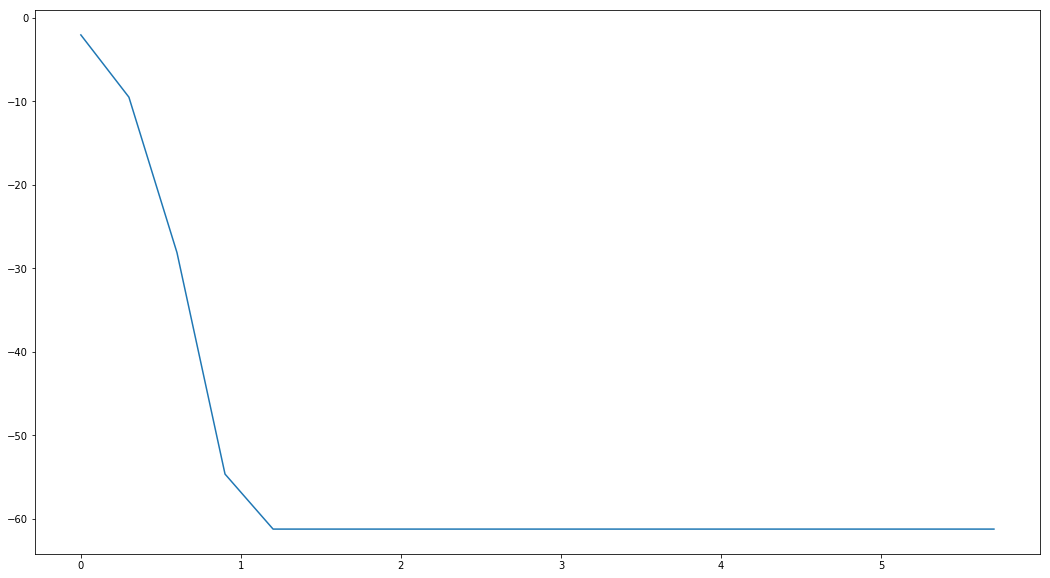

In [149]:
plt.figure(figsize=(18, 10))
plt.plot(combined.alpha[0:20], combined.score[0:20])

In [ ]:
results_LASSO.best_params_

In [ ]:
results_RIDGE.best_params_

In [ ]:
results_EL.best_params_

Проверим полученные результаты:

Для Lasso выберем минимальный коээфициент, отличающийся от 0, полученного при подборе гиперпараметра, чтобы результат не выродился в обычную линейную модель.

In [ ]:
check_model (X_train, X_test, y_train, y_test, Lasso(alpha = 0.01,random_state = 5), numerical_features)

In [ ]:
check_model (X_train, X_test, y_train, y_test, Ridge(alpha = 3.03,random_state = 5), numerical_features)

In [ ]:
check_model (X_train, X_test, y_train, y_test, ElasticNet(alpha=0.1, l1_ratio=0.91,random_state = 5), numerical_features)

Проверим результаты, с признаками, обладающими высокой корреляцией.

In [ ]:
check_model (X_train, X_test, y_train, y_test, Lasso(alpha = 0.01,random_state = 5), golden_features_list[:-1].keys())

In [ ]:
check_model (X_train, X_test, y_train, y_test, Ridge(alpha=3.03,random_state = 5), golden_features_list[:-1].keys())

In [ ]:
check_model (X_train, X_test, y_train, y_test, ElasticNet(alpha=0.1, l1_ratio=0.91), golden_features_list[:-1].keys())

Вывод. Использование регуляризации с подобранными гиперпараметрами дает увеличение точности и уменьшение ошибки, но оно сравнимо с использованием обычной регрессии, только с признаками, обладающими высокой корреляцией к целевой.

Также попробуем использовать Linear Support Vector Regression, в качестве альтернативы обычной регрессии.

Параметр C, выберем исходя из полученного при подборе значения alpha для ElasticNet.

Epsilon(как расстояние до линии регресси) выберем как 0.4 (дефолтное значение 0.1).
Использовалось несколько значений epsilon от 0.1 до 0.4, 0.4 оставил как значение, дающее наилучший результат.

In [ ]:
l_svm_r = LinearSVR(epsilon = 0.4,C = 0.1, random_state=5, tol=1e-4,max_iter=10000)

In [ ]:
somescaler = MinMaxScaler()
x_train_svm = somescaler.fit_transform(X_train)
x_test_svm = somescaler.transform(X_test)

In [ ]:
l_svm_r.fit(x_train_svm, y_train)

In [ ]:
l_svm_r.coef_

In [ ]:
print ("SVR")
print ("Scores via train dataset.")
print ("mean squared error")
y_pred_t = l_svm_r.predict(x_train_svm)
print (np.sqrt(mean_squared_error(y_train, y_pred_t)))
print ("R2 score")
accuracy_train = r2_score (y_train,y_pred_t)
print (accuracy_train)
  
print ("\n")
print ("Scores via test dataset.")
print ("mean squared error")
y_pred = l_svm_r.predict(x_test_svm)
print (np.sqrt(mean_squared_error(y_test, y_pred)))
print ("R2 score")
accuracy_test = r2_score (y_test,y_pred)
print (accuracy_test)

**Заключение.**

Наименьшей ошибкой и большей точностью обладает модель линейной регрессии, с признаками, обладающими высокой корреляцией с целевой переменной.

Анализ остатков проводился на примере простой линейной регрессии/регрессии с высококоррелирующими признаками.
По итогу, гомоскедастичности не наблюдалось, судя по графикам остатки распределены не нормально, что говорит о том, что модель хоть и достаточно хорошо описывает поведение, но не удовлетворяет одному из условий теоремы Гаусса-Маркова.


Подбор гиперпаратров оказался не так эффективен, и значение ошибки/точности оказались близки, к модели описанной выше.
Это может говорить о том, что ограничивание весов/отбор признаков не эффективно для данной задачи.

Наиболее важной фичей стал PT08.S2(NMHC), что показала также и величина корреляции.

Также, можно сказать, что разложение даты и времени в новые колонки вносит весомый вклад в повышение описывающей способности модели.

**Appendix**

Также попробуем использовать LassCV, RidgeCV для сравнения полученных результатов.

In [ ]:
somescaler = MinMaxScaler()
x_train_rcv = somescaler.fit_transform(X_train)
x_test_rcv = somescaler.transform(X_test)

alphas = np.linspace(0.01, 100, 200)
my_rcv_cv = TimeSeriesSplit(n_splits=5).split(x_train_rcv)
rcv = RidgeCV(alphas, cv = my_rcv_cv)
lcv = LassoCV(n_alphas=100, cv = my_rcv_cv)

In [ ]:
rcv.fit(x_train_rcv,y_train)

In [ ]:
rcv.alpha_

In [ ]:
print ("RidgeCV")
print ("Scores via train dataset.")
print ("mean squared error")
y_pred_t = rcv.predict(x_train_rcv)
print (np.sqrt(mean_squared_error(y_train, y_pred_t)))
print ("R2 score")
accuracy_train = r2_score (y_train,y_pred_t)
print (accuracy_train)
  
print ("\n")
print ("Scores via test dataset.")
print ("mean squared error")
y_pred = rcv.predict(x_test_rcv)
print (np.sqrt(mean_squared_error(y_test, y_pred)))
print ("R2 score")
accuracy_test = r2_score (y_test,y_pred)
print (accuracy_test)

In [ ]:
somescaler = MinMaxScaler()
x_train_lcv = somescaler.fit_transform(X_train)
x_test_lcv = somescaler.transform(X_test)

my_lcv_cv = TimeSeriesSplit(n_splits=5).split(x_train_lcv)
lcv = LassoCV(n_alphas=100, cv = my_lcv_cv)

In [ ]:
lcv.fit(x_train_lcv,y_train)

In [ ]:
lcv.alpha_

In [ ]:
print ("LassoCV")
print ("Scores via train dataset.")
print ("mean squared error")
y_pred_t = lcv.predict(x_train_lcv)
print (np.sqrt(mean_squared_error(y_train, y_pred_t)))
print ("R2 score")
accuracy_train = r2_score (y_train,y_pred_t)
print (accuracy_train)
  
print ("\n")
print ("Scores via test dataset.")
print ("mean squared error")
y_pred = lcv.predict(x_test_lcv)
print (np.sqrt(mean_squared_error(y_test, y_pred)))
print ("R2 score")
accuracy_test = r2_score (y_test,y_pred)
print (accuracy_test)

Вывод. В целом, качественного улучшения не произошло. Результаты кардинально не изменились.

In [ ]:
#function for outliers checking
def outliers_z_score(ys):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)
out = outliers_z_score(df_num[Target_var])
out

**Version with sklearn_pandas**

In [ ]:
NUMERICAL = df_num.drop('C6H6(GT)',axis = 1)
numerical_def = gen_features(
    columns=[[c] for c in NUMERICAL],
    classes=[
        {'class': MinMaxScaler}
        #{'class': QuantileTransformer}
    ]
)

In [ ]:
"""CATEGORICAL = df_cat
categorical_def = gen_features(
    columns=[[c] for c in CATEGORICAL],
    classes=[
        {'class': OneHotEncoder, 'return_df': False, 'handle_unknown': 'ignore', 'use_cat_names': True}
    ]    
)"""

In [ ]:
test_def = numerical_def #+ categorical_def

In [ ]:
def check_model_mapper(train_x, test_x, train_y, test_y, regr,features):
    #print (train_y)
    
    mapper = DataFrameMapper(features, df_out=True)
    train_x = mapper.fit_transform(train_x)
    test_x = mapper.transform(test_x)
    #print (train_x)
        
    regr.fit(train_x, train_y)
        
    print ("Scores via train dataset.")
    print ("mean squared error")
    y_pred_t = regr.predict(train_x)
    print (np.sqrt(mean_squared_error(train_y, y_pred_t)))
    print ("R2 score")
    accuracy_train = r2_score (train_y,y_pred_t)
    print (accuracy_train)
    
    print ("\n")
    print ("Scores via test dataset.")
    print ("mean squared error")
    y_pred = regr.predict(test_x)
    print (np.sqrt(mean_squared_error(test_y, y_pred)))
    print ("R2 score")
    accuracy_test = r2_score (test_y,y_pred)
    print (accuracy_test)
    coefs = regr.coef_
    print(pd.DataFrame(coefs,train_x[numerical_features].columns,columns=['coef']).sort_values(by='coef',ascending = False))

In [ ]:
lin_regr = LinearRegression()
check_model_mapper (X_train, X_test, y_train, y_test, lin_regr, test_def)

In [ ]:
def grid_cv_test (x_train, y_train, features):
    
    mapper = DataFrameMapper(features, df_out=True)
    x_train = mapper.fit_transform(x_train)
    
    my_cv = TimeSeriesSplit(n_splits=5).split(x_train)  
    
    model = Ridge()
    param_search = {'alpha' : np.linspace(0, 300, 100)}

    model_el = ElasticNet(random_state=5)
    param_search_el = {
        'alpha': np.linspace(0, 300, 100),
        'l1_ratio': np.arange(0, 5, 0.1)}

    gsearch = GridSearchCV(estimator=model, 
                           cv=my_cv,
                           param_grid=param_search,
                           verbose = 5,
                           n_jobs=-1,
                           scoring=['neg_mean_squared_error', 'r2'], 
                           refit='neg_mean_squared_error',)

    gsearch.fit(x_train, y_train)
    return gsearch

In [ ]:
gg = grid_cv_test(X_train, y_train,test_def)
gg.best_params_

In [ ]:
check_model_mapper(X_train, X_test, y_train, y_test, Ridge(alpha=3.03), test_def)